In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("candidato.csv")

In [3]:
print(df.head())

   ID           resID     atmilitary           atreligion               ated  \
0   0  A2NEN4NSNS2O8S  Did Not Serve               Mormon  Community college   
1   1  A2NEN4NSNS2O8S         Served                 None              No BA   
2   2  A2NEN4NSNS2O8S  Did Not Serve             Catholic      Small college   
3   3  A2NEN4NSNS2O8S         Served  Mainline protestant      Small college   
4   4  A2NEN4NSNS2O8S         Served                 None    Baptist college   

                atprof atinc           atrace  atage  atmale  selected  \
0           Car dealer  5.1M            White     75  Female         0   
1  High school teacher   65K   Asian American     60    Male         1   
2               Farmer   32K  Native American     68  Female         1   
3               Doctor   54K            White     75    Male         0   
4               Doctor  5.1M  Native American     45  Female         0   

     rating  
0  0.333333  
1  0.500000  
2  0.666667  
3  0.666667  
4  0

In [4]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm


# Fórmula para análise conjunta (ajuste conforme quiser incluir mais atributos)
formula = 'selected ~ C(atmilitary) + C(atreligion) + C(ated) + C(atprof) + C(atinc) + C(atrace) + atage + C(atmale)'

# Constrói as matrizes para regressão
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = np.ravel(y)

# Ajusta o modelo logístico
model = sm.Logit(y, X).fit()

# Mostra os coeficientes (utilidades parciais)
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.648032
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3466
Model:                          Logit   Df Residuals:                     3437
Method:                           MLE   Df Model:                           28
Date:                Fri, 02 May 2025   Pseudo R-squ.:                 0.06509
Time:                        08:13:35   Log-Likelihood:                -2246.1
converged:                       True   LL-Null:                       -2402.4
Covariance Type:            nonrobust   LLR p-value:                 7.202e-50
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.3735

In [5]:
# Extrai os coeficientes (exceto o Intercepto)
coefs = model.params.drop("Intercept")

# Agrupa coeficientes por atributo
atributos = {}
for var in coefs.index:
    attr = var.split('[')[0] if '[' in var else var
    atributos.setdefault(attr, []).append(coefs[var])

# Calcula importância relativa
importancias = {}
for attr, vals in atributos.items():
    importancias[attr] = np.max(vals) - np.min(vals)

# Normaliza em percentual
total = sum(importancias.values())
importancias_relativas = {k: round(v / total * 100, 2) for k, v in importancias.items()}

# Mostra os resultados ordenados
importancias_df = pd.DataFrame.from_dict(importancias_relativas, orient='index', columns=['Importância (%)'])
importancias_df = importancias_df.sort_values(by='Importância (%)', ascending=False)

print(importancias_df)



               Importância (%)
C(ated)                  37.01
C(atprof)                29.09
C(atreligion)            18.36
C(atinc)                  7.82
C(atrace)                 7.72
C(atmilitary)             0.00
C(atmale)                 0.00
atage                     0.00


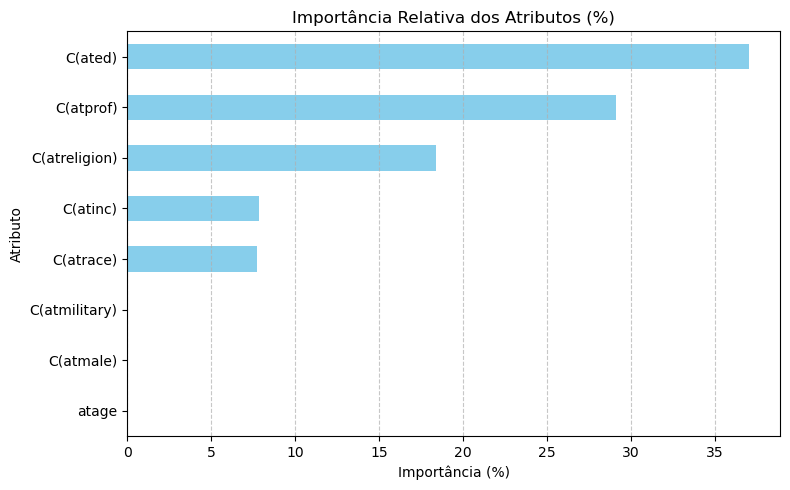

In [6]:
import matplotlib.pyplot as plt

# Cria o gráfico de barras
importancias_df.plot(kind='barh', legend=False, figsize=(8, 5), color='skyblue')
plt.title("Importância Relativa dos Atributos (%)")
plt.xlabel("Importância (%)")
plt.ylabel("Atributo")
plt.gca().invert_yaxis()  # Coloca o mais importante no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/gc/wnk1ypv53vg8jsdwlrl46lsw0000gn/T/ipykernel_10229/2495627760.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ated_df['Nível'] = ated_df['Nível'].str.replace('C(ated)[T.', '', regex=False).str.replace(']', '')


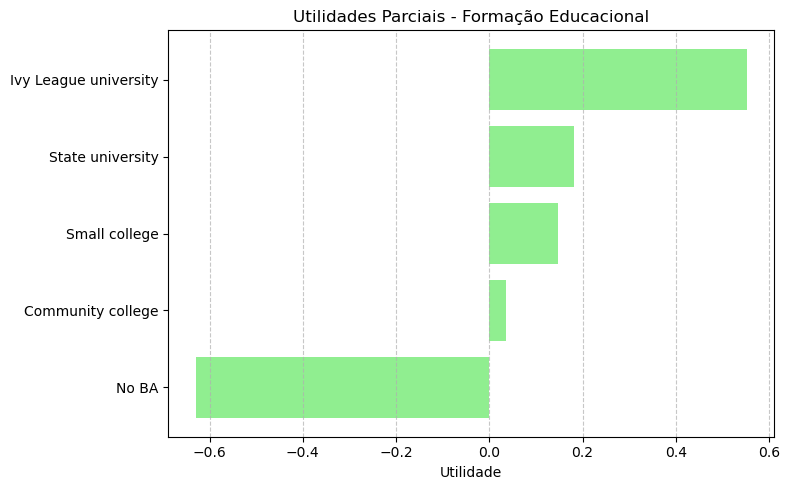

In [7]:
# Filtra os coeficientes apenas de C(ated)
ated_coefs = model.params.filter(like="C(ated)")

# Converte para DataFrame
ated_df = ated_coefs.reset_index()
ated_df.columns = ['Nível', 'Utilidade']

# Organiza os nomes para ficar mais legível
ated_df['Nível'] = ated_df['Nível'].str.replace('C(ated)[T.', '', regex=False).str.replace(']', '')

# Ordena do menor para o maior
ated_df = ated_df.sort_values(by='Utilidade')

# Plota o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(ated_df['Nível'], ated_df['Utilidade'], color='lightgreen')
plt.title("Utilidades Parciais - Formação Educacional")
plt.xlabel("Utilidade")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/gc/wnk1ypv53vg8jsdwlrl46lsw0000gn/T/ipykernel_10229/1768512310.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prof_df['Nível'] = prof_df['Nível'].str.replace('C(atprof)[T.', '', regex=False).str.replace(']', '')


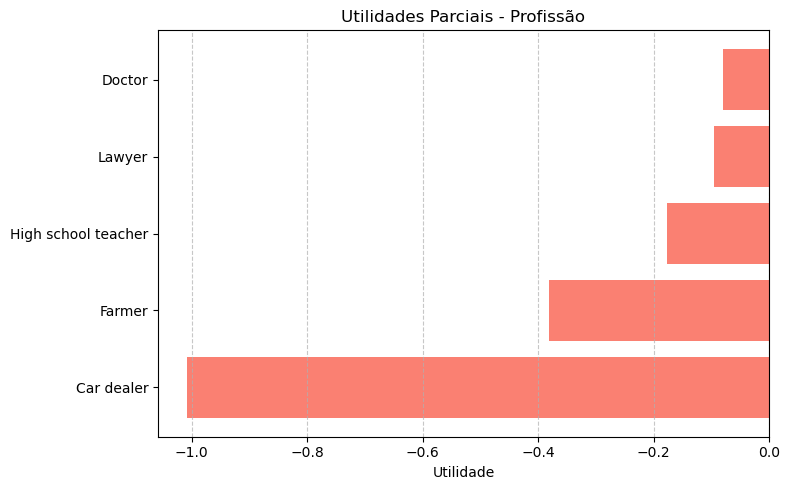

In [8]:
# Filtra os coeficientes de C(atprof)
prof_coefs = model.params.filter(like="C(atprof)")

# Converte para DataFrame
prof_df = prof_coefs.reset_index()
prof_df.columns = ['Nível', 'Utilidade']
prof_df['Nível'] = prof_df['Nível'].str.replace('C(atprof)[T.', '', regex=False).str.replace(']', '')

# Ordena e plota
prof_df = prof_df.sort_values(by='Utilidade')

plt.figure(figsize=(8, 5))
plt.barh(prof_df['Nível'], prof_df['Utilidade'], color='salmon')
plt.title("Utilidades Parciais - Profissão")
plt.xlabel("Utilidade")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/gc/wnk1ypv53vg8jsdwlrl46lsw0000gn/T/ipykernel_10229/2783549373.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rel_df['Nível'] = rel_df['Nível'].str.replace('C(atreligion)[T.', '', regex=False).str.replace(']', '')


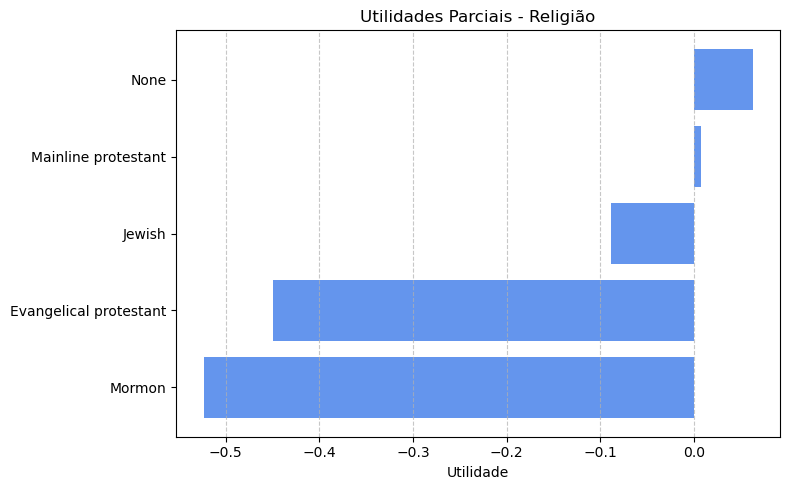

In [9]:
# Filtra os coeficientes de C(atreligion)
rel_coefs = model.params.filter(like="C(atreligion)")

# Converte para DataFrame
rel_df = rel_coefs.reset_index()
rel_df.columns = ['Nível', 'Utilidade']
rel_df['Nível'] = rel_df['Nível'].str.replace('C(atreligion)[T.', '', regex=False).str.replace(']', '')

# Ordena e plota
rel_df = rel_df.sort_values(by='Utilidade')

plt.figure(figsize=(8, 5))
plt.barh(rel_df['Nível'], rel_df['Utilidade'], color='cornflowerblue')
plt.title("Utilidades Parciais - Religião")
plt.xlabel("Utilidade")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import patsy
import statsmodels.api as sm
import pickle

# Carrega o dataset
df = pd.read_csv('candidato.csv')


df['atmale'] = df['atmale'].astype(str)  # garantir que 'atmale' seja categórico

# Fórmula da análise conjunta
formula = 'selected ~ C(atmilitary) + C(atreligion) + C(ated) + C(atprof) + C(atinc) + C(atrace) + C(atmale) + atage'

# Criação das matrizes de design
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Ajuste do modelo Logit (logístico)
model = sm.Logit(y, X).fit()

# Salva o modelo com a estrutura de design
with open('modelo_logit.pkl', 'wb') as f:
    pickle.dump(model, f)

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.648032
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               selected   No. Observations:                 3466
Model:                          Logit   Df Residuals:                     3437
Method:                           MLE   Df Model:                           28
Date:                Fri, 02 May 2025   Pseudo R-squ.:                 0.06509
Time:                        08:14:06   Log-Likelihood:                -2246.1
converged:                       True   LL-Null:                       -2402.4
Covariance Type:            nonrobust   LLR p-value:                 7.202e-50
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.3735

In [11]:
import pandas as pd
import patsy
import statsmodels.api as sm
import pickle

# Carregue o dataset
df = pd.read_csv('candidato.csv')

# Certifique-se de que atmale é string (tratado como categoria)
df['atmale'] = df['atmale'].astype(str)

# Crie fórmula da análise conjunta
formula = 'selected ~ C(atmilitary) + C(atreligion) + C(ated) + C(atprof) + C(atinc) + C(atrace) + C(atmale) + atage'

# Cria matriz de design (aqui está o segredo: `patsy` guarda o design_info)
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Ajusta o modelo Logit
model = sm.Logit(y, X).fit()

# Salva o modelo com o design_info embutido
with open('modelo_logit.pkl', 'wb') as f:
    pickle.dump(model, f)

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.648032
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               selected   No. Observations:                 3466
Model:                          Logit   Df Residuals:                     3437
Method:                           MLE   Df Model:                           28
Date:                Fri, 02 May 2025   Pseudo R-squ.:                 0.06509
Time:                        08:14:12   Log-Likelihood:                -2246.1
converged:                       True   LL-Null:                       -2402.4
Covariance Type:            nonrobust   LLR p-value:                 7.202e-50
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.3735

In [13]:
import pandas as pd
import patsy
import statsmodels.api as sm
import pickle

# Carrega os dados
df = pd.read_csv("candidato.csv")
df["atmale"] = df["atmale"].astype(str)

# Fórmula
formula = 'selected ~ C(atmilitary) + C(atreligion) + C(ated) + C(atprof) + C(atinc) + C(atrace) + C(atmale) + atage'

# Matrizes
y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")

# Treina o modelo
model = sm.Logit(y, X).fit()

# Salva o modelo e a fórmula (sem design_info)
model_package = {
    "model": model,
    "formula": formula
}

with open("modelo_logit.pkl", "wb") as f:
    pickle.dump(model_package, f)

print("Modelo treinado e salvo com sucesso.")



Optimization terminated successfully.
         Current function value: 0.648032
         Iterations 5
Modelo treinado e salvo com sucesso.
